In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("Visadataset.csv")

In [4]:
df.head(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


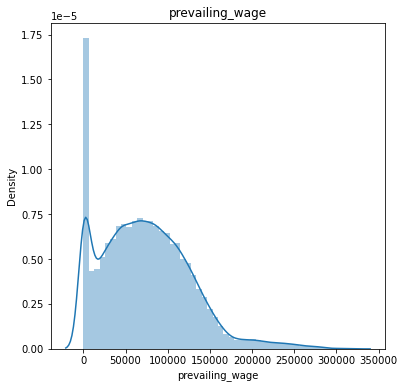

In [6]:
#Distribution of prevailing_wage
plt.figure(figsize=(6,6))
sns.distplot(df['prevailing_wage'])
plt.title('prevailing_wage')
plt.show()

array([[<AxesSubplot:title={'center':'prevailing_wage'}>]], dtype=object)

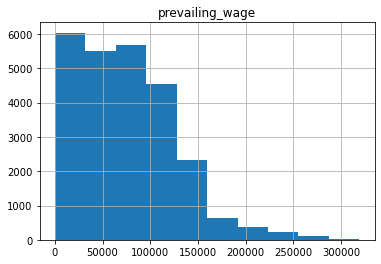

In [7]:
df.hist(column="prevailing_wage")

<AxesSubplot:>

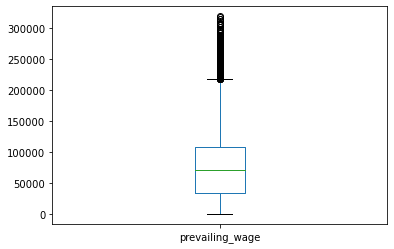

In [8]:

df.boxplot(column =['prevailing_wage'], grid = False)

<AxesSubplot:xlabel='prevailing_wage'>

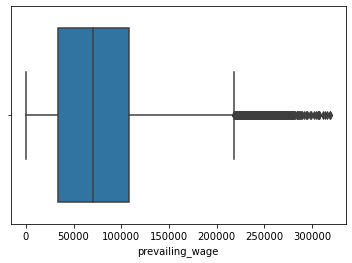

In [9]:
sns.boxplot(x = 'prevailing_wage', data = df)

<AxesSubplot:xlabel='prevailing_wage', ylabel='education_of_employee'>

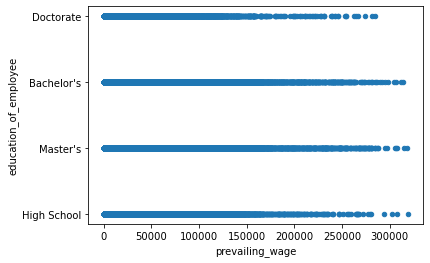

In [16]:
df.plot.scatter(x="prevailing_wage",y="education_of_employee")

<AxesSubplot:xlabel='prevailing_wage', ylabel='continent'>

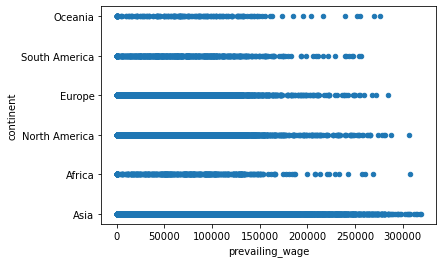

In [17]:
df.plot.scatter(x="prevailing_wage",y="continent")

Fromt the above two plots we can see that we have detected outliers is our dataset and the outliers should not be removed as they will form an important part of our analysis. The outliers define the relationship between different columns. So let us the copy the dataset into another varibale and then apply the outlier removal technique to study its effects.

In [18]:
df2 = df

In [19]:
df2.head(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


We use Z-score Outlier removal technique if dataset is distributed normally but since our dataset is not distributed normally, we will use the IQR method to remove outlier

In [20]:
percentile25 = df['prevailing_wage'].quantile(0.25)
percentile75 = df['prevailing_wage'].quantile(0.75)

In [23]:
iqr = percentile75 - percentile25

In [24]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [25]:
df[df['prevailing_wage'] > upper_limit]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [26]:
df[df['prevailing_wage']< lower_limit]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status


In [27]:
new_df = df[df['prevailing_wage'] < upper_limit]

In [28]:
new_df.shape

(25053, 12)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Ana

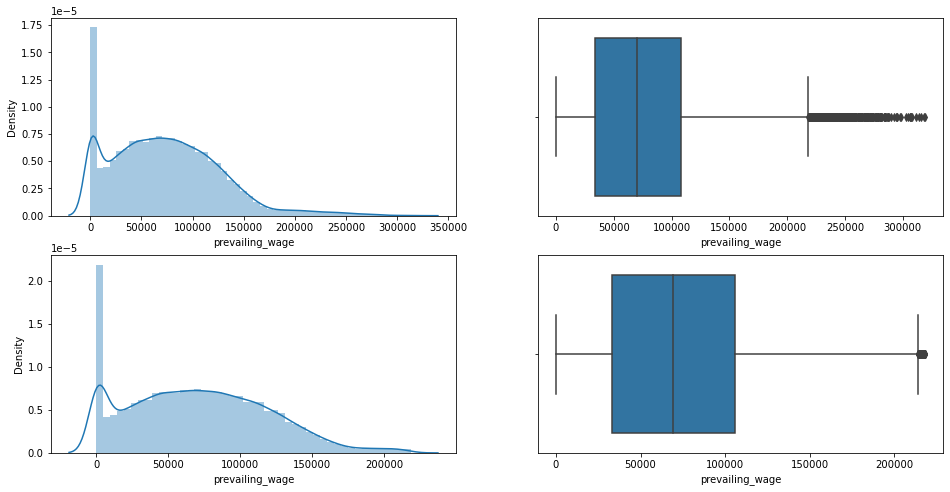

In [29]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['prevailing_wage'])
plt.subplot(2,2,2)
sns.boxplot(df['prevailing_wage'])
plt.subplot(2,2,3)
sns.distplot(new_df['prevailing_wage'])
plt.subplot(2,2,4)
sns.boxplot(new_df['prevailing_wage'])
plt.show()

Thus we have removed the IQR from our dataset 


## Use of Capping to replace outlier values with the capped values

In [30]:
df3 = df

In [31]:
df3.head(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


In [32]:
upper_limit = df['prevailing_wage'].quantile(0.99)
lower_limit = df['prevailing_wage'].quantile(0.01)

In [33]:
upper_limit 

238215.44999999987

In [34]:
lower_limit

106.0469

In [37]:
df3["prevailing_wage_capped"] = np.where(df3["prevailing_wage"]> upper_limit, upper_limit,
                        np.where(df3["prevailing_wage"]< lower_limit, lower_limit,
                        df3["prevailing_wage"]))

In [38]:
df3["prevailing_wage_capped"]

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    238215.4500
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage_capped, Length: 25480, dtype: float64

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='prevailing_wage', ylabel='Density'>

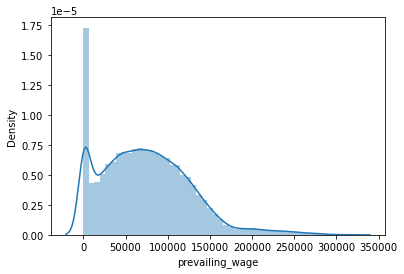

In [41]:
sns.distplot(df['prevailing_wage'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='prevailing_wage_capped', ylabel='Density'>

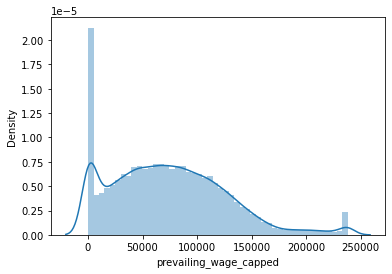

In [43]:
sns.distplot(df3['prevailing_wage_capped'])

## Zcore based outlier removal

In [44]:
df4 = df

In [49]:
print("Highest allowed",df4['prevailing_wage'].mean() + 3*df4['prevailing_wage'].std())
print("Lowest allowed",df4['prevailing_wage'].mean() - 3*df4['prevailing_wage'].std())

Highest allowed 232903.64157271292
Lowest allowed -83992.0123885285


In [50]:
df4[(df4['prevailing_wage'] > 8.80) | (df4['prevailing_wage'] < 5.11)]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_capped
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,592.2029
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,83425.6500
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,122996.8600
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,83434.0300
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,149907.3900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,77092.5700
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,238215.4500
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,146298.8500
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,86154.7700


In [51]:
new_df4 = df4[(df['prevailing_wage'] < 8.80) & (df4['prevailing_wage'] > 5.11)]
new_df4

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_capped
5384,EZYV5385,North America,Master's,N,N,4405,1993,Northeast,8.5186,Hour,Y,Denied,106.0469
8914,EZYV8915,Asia,Bachelor's,N,N,4427,1998,Northeast,5.6396,Hour,Y,Denied,106.0469
17033,EZYV17034,Asia,Master's,Y,N,2587,1989,South,7.0647,Hour,Y,Certified,106.0469
19425,EZYV19426,North America,Bachelor's,Y,N,2051,2004,Northeast,5.1868,Hour,Y,Denied,106.0469
19593,EZYV19594,Asia,Master's,N,N,528,2004,Northeast,5.4108,Hour,Y,Certified,106.0469
20482,EZYV20483,North America,Bachelor's,N,N,2584,1900,South,6.3305,Hour,Y,Denied,106.0469


In [52]:
upper_limit = df4['prevailing_wage'].mean() + 3*df4['prevailing_wage'].std()
lower_limit = df4['prevailing_wage'].mean() - 3*df4['prevailing_wage'].std()

In [54]:
df4['prevailing_wage'] = np.where(
    df4['prevailing_wage']>upper_limit,
    upper_limit,
    np.where(
        df4['prevailing_wage']<lower_limit,
        lower_limit,
        df4['prevailing_wage']
    )
)

In [55]:
df['prevailing_wage'].describe()

count     25480.000000
mean      74168.398743
std       51836.352191
min           2.136700
25%       34015.480000
50%       70308.210000
75%      107735.512500
max      232903.641573
Name: prevailing_wage, dtype: float64

# 